In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts import preprocessing
import pickle

In [2]:
categorised_neurons_path = ('/hpc/mzhu843/modelling/nest/DATA/processed/model2/small_categorised_neurons_5.pkl')
with open(categorised_neurons_path, 'rb') as file:
    categorised_neurons = pickle.load(file)

place_cell_ids = [33, 35, 70, 75, 157]
place_cell_indices = [x -1 for x in place_cell_ids]

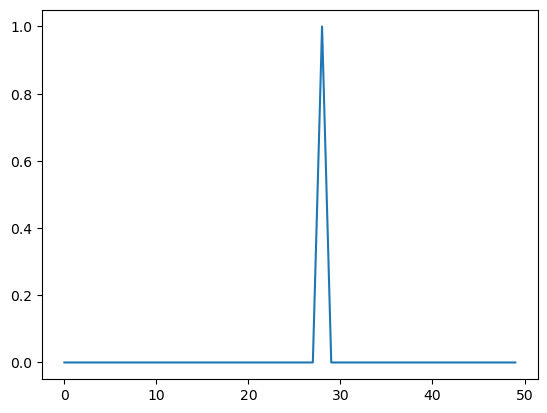

In [18]:
t = np.arange(0, 150, 0.1)

spike_trains = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/S_5_p.npy')[place_cell_indices, :]

og = np.copy(spike_trains)

for i in range(len(spike_trains)):
    spike_trains[i] = preprocessing.convolve_calcium_alpha(spike_trains[i], t, 0.5)

calcium, fmax = preprocessing.preprocess_calcium_data(spike_trains, og, [], [], -50, -70, -37.1, -65.1)

# np.save('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/small_con_S_5_p.npy', calcium)

# # plt.plot(calcium[0][0:250])


In [4]:

# np.save('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/small_S_5_p.npy', og)

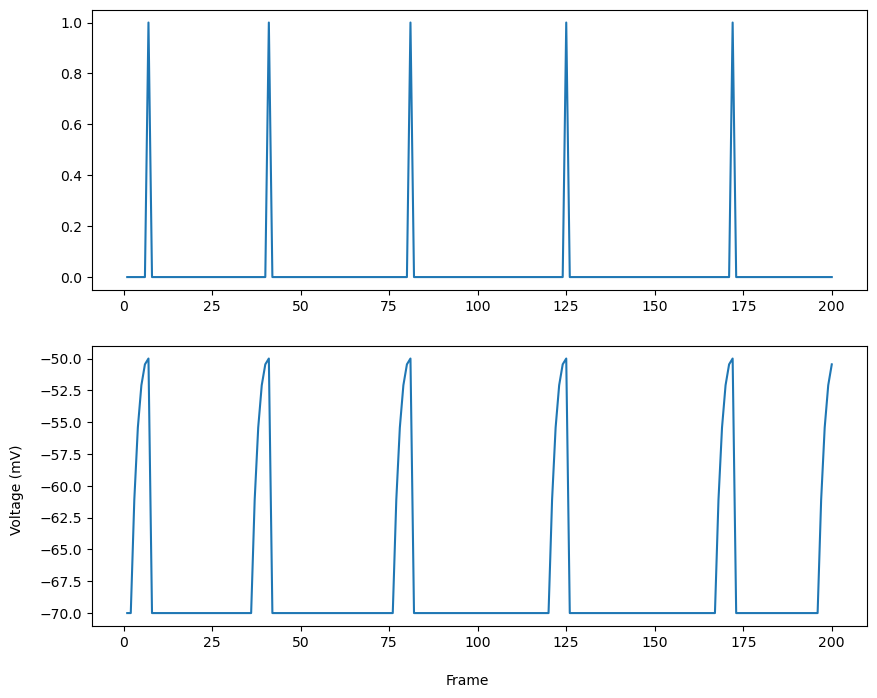

In [54]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 3 rows, 1 column



# Plot data in each subplot
axs[0].plot(np.linspace(1, 200, 200), og[2][12500:12700])


axs[1].plot(np.linspace(1, 200, 200), calcium[2][12500:12700])

# Set common labels
fig.text(0.5, 0.041, 'Frame', ha='center', va='center')
fig.text(0.05, 0.28, 'Voltage (mV)', ha='center', va='center', rotation='vertical')


# Show plot
plt.show()

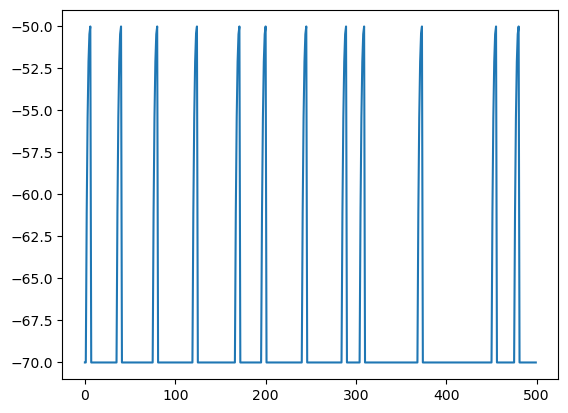

In [36]:
plt.plot(calcium[2][12500:12700])